<a href="https://colab.research.google.com/github/RBaragu/cookie-recipe/blob/master/Decision_Tree_Classifier_Rachael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Machine Learning


Define the metric for success

To predict whether a potential promotee at a
checkpoint will be promoted or not after the evaluation process

Background information

HR analytics is revolutionising the way human resources departments operate, leading
to higher efficiency and better results overall. Human resources have been using
analytics for years. However, the collection, processing, and analysis of data have been
largely manual, and given the nature of human resources dynamics and HR KPIs, the
approach has been constraining HR. Therefore, it is surprising that HR departments
woke up to the utility of machine learning so late in the game.

Recording the Experimental Design

1. Data Understanding by reading and loading the data

2. Data cleaning

3. Data Standardization

4. Data visualization

5. Model Building

6. Findings and reccomendations


# Loading the Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

Load the dataset

In [ ]:
df = pd.read_csv('https://bit.ly/2ODZvLCHRDataset')

In [ ]:
df.shape

(54808, 14)

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Data Standardization

In [ ]:
df.drop("employee_id", inplace=True, axis=1)

In [ ]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(0)

In [ ]:
df['previous_year_rating'] = df['previous_year_rating'].astype('int')

In [ ]:
df['education'].mode()

0    Bachelor's
dtype: object

In [ ]:
df['education'] = df['education'].fillna(str(df['education'].mode()))

In [ ]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Data Visualization

# Exploratory Data Analysis

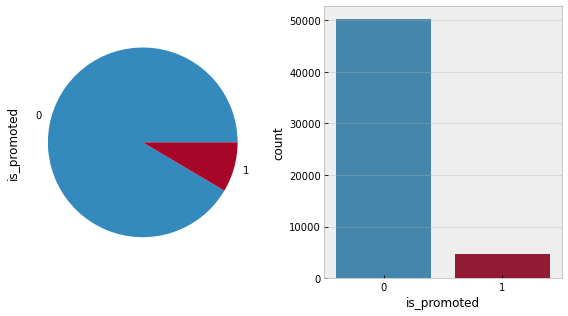

In [ ]:
fig = plt.figure(figsize=(8,4.5))
fig.add_subplot(1,2,1)
df['is_promoted'].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
sns.countplot(df['is_promoted'])
plt.tight_layout()
plt.show()

In [ ]:
# Correlation

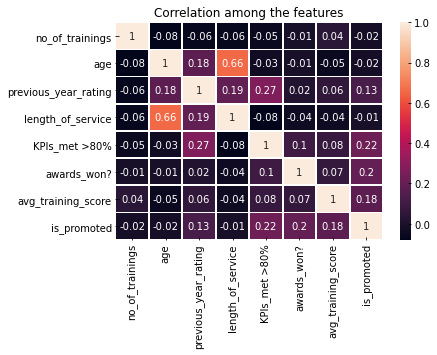

In [ ]:
sns.heatmap(round(df.corr(), 2), annot=True, linewidths=.8)
plt.title('Correlation among the features', fontsize = 12)
plt.show()

In [ ]:
Model Building

Feature Engineering

In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'm' else 0)
object_type_columns = df.select_dtypes(['object']).columns

In [ ]:
new_df = pd.get_dummies(df[object_type_columns], drop_first=True)

In [ ]:
data = pd.concat([df, new_df], axis=1)

In [ ]:
data.drop(object_type_columns, inplace=True, axis = 1)

Separating Dependent & Independent Variables

In [ ]:
y = data['is_promoted']
X = data.drop('is_promoted', axis=1)


Splitting data into training & testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 119)

Decision Tree classifier

In [ ]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini')

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('The Model Accuracy is: {}'.format(accuracy_score(y_test, y_pred)))


The Model Accuracy is: 0.9242838898011312


#Findings and recommendations

Length of service and age have the highest correlation


There is a 92% chance that a  potential promotee at a checkpoint will be promoted  